# Analysis of succesfull actor profiles of over time
A successfull actor profile is defined as the actor profile of the most successfull actors in a certain genre. For simplicity and staying interesting, we have selected certain genres: ```...```. An actor profile is a subset of actor features. To limit ourselves, we have only consider these actor features: ```gender```, ```age_at_movie_start``` and```experience_at_movie_start``` (in total and for each selected genre respectively). An actor is successfullness is determined by the ordering he or she has in the cast (see column: 'ordering' in IMDB's principals data) as well as by the success of the movie the actor is playing in. As a movie success metric both - IMDB's ratings and revenue - are used.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading in and preparing preprocessed data

In [14]:
# import movie and actor data
movie_actor_combi = pd.read_csv("./data/actor_movie_combi.csv")
movie_actor_combi # note: only actors with importance to the respective movieare considered. The importance is determined by IMDB itself and stored in "ordering" column

,Unnamed: 0,tconst,ordering,nconst,gender,primaryName,birthYear,deathYear,startYear,genres,deatYear,age_at_movie_start,averageRating,numVotes,exp_so_far
0,0,tt0000005,1,nm0443482,0,Charles Kayser,1878.0,1966,1893.0,"Comedy,Short",1966.0,15.0,6.2,2554.0,0
1,1,tt0000005,2,nm0653042,0,John Ott,1850.0,1931,1893.0,"Comedy,Short",1931.0,43.0,6.2,2554.0,0
2,2,tt0000007,1,nm0179163,0,James J. Corbett,1866.0,1933,1894.0,"Short,Sport",1933.0,28.0,5.4,797.0,0
3,3,tt0000007,2,nm0183947,0,Peter Courtney,1867.0,1896,1894.0,"Short,Sport",1896.0,27.0,5.4,797.0,0
4,4,tt0000008,1,nm0653028,0,Fred Ott,1860.0,1936,1894.0,"Documentary,Short",1936.0,34.0,5.4,2069.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698941,20986391,tt9916406,1,nm0682935,0,Ryszard Pietruski,1922.0,1996,1976.0,Crime,1996.0,54.0,5.8,5.0,34
698942,20986392,tt9916406,2,nm0468565,0,August Kowalczyk,1921.0,2012,1976.0,Crime,2012.0,55.0,5.8,5.0,23
698943,20986393,tt9916406,3,nm0387710,0,Zygmunt Hobot,1930.0,2004,1976.0,Crime,2004.0,46.0,5.8,5.0,3
698944,20986395,tt9916406,9,nm0926802,0,Kazimierz Wichniarz,1915.0,1995,1976.0,Crime,1995.0,61.0,5.8,5.0,13


In [15]:
# add startDecade column to prepare data over time
movie_actor_combi["startDecade"] = movie_actor_combi["startYear"]/10
movie_actor_combi["startDecade"] = movie_actor_combi["startDecade"].astype('int')*10

movie_actor_combi

,Unnamed: 0,tconst,ordering,nconst,gender,primaryName,birthYear,deathYear,startYear,genres,deatYear,age_at_movie_start,averageRating,numVotes,exp_so_far,startDecade
0,0,tt0000005,1,nm0443482,0,Charles Kayser,1878.0,1966,1893.0,"Comedy,Short",1966.0,15.0,6.2,2554.0,0,1890
1,1,tt0000005,2,nm0653042,0,John Ott,1850.0,1931,1893.0,"Comedy,Short",1931.0,43.0,6.2,2554.0,0,1890
2,2,tt0000007,1,nm0179163,0,James J. Corbett,1866.0,1933,1894.0,"Short,Sport",1933.0,28.0,5.4,797.0,0,1890
3,3,tt0000007,2,nm0183947,0,Peter Courtney,1867.0,1896,1894.0,"Short,Sport",1896.0,27.0,5.4,797.0,0,1890
4,4,tt0000008,1,nm0653028,0,Fred Ott,1860.0,1936,1894.0,"Documentary,Short",1936.0,34.0,5.4,2069.0,0,1890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698941,20986391,tt9916406,1,nm0682935,0,Ryszard Pietruski,1922.0,1996,1976.0,Crime,1996.0,54.0,5.8,5.0,34,1970
698942,20986392,tt9916406,2,nm0468565,0,August Kowalczyk,1921.0,2012,1976.0,Crime,2012.0,55.0,5.8,5.0,23,1970
698943,20986393,tt9916406,3,nm0387710,0,Zygmunt Hobot,1930.0,2004,1976.0,Crime,2004.0,46.0,5.8,5.0,3,1970
698944,20986395,tt9916406,9,nm0926802,0,Kazimierz Wichniarz,1915.0,1995,1976.0,Crime,1995.0,61.0,5.8,5.0,13,1970


In [16]:
# group by startDecade
movie_actor_combi_per_decade = movie_actor_combi.groupby(["startDecade"]).mean().reset_index()
movie_actor_combi_per_decade

,startDecade,Unnamed: 0,ordering,gender,birthYear,deathYear,startYear,deatYear,age_at_movie_start,averageRating,numVotes,exp_so_far
0,1880,1.469787e+07,1.000000,0.000000,1851.000000,1902.500000,1884.500000,1902.500000,33.500000,5.350000,897.500000,0.000000
1,1890,1.942531e+06,1.394595,0.205405,1862.437838,1936.383784,1896.751351,1936.383784,34.313514,5.129730,606.643243,16.464865
2,1900,6.434423e+05,3.906347,0.351087,1875.533067,1941.462938,1907.747448,1941.462938,32.214381,5.223302,233.814913,29.470928
3,1910,9.200100e+05,4.077170,0.330658,1880.980121,1948.964131,1914.714533,1948.964131,33.734412,5.668224,169.157982,30.121558
4,1920,6.119988e+05,3.591880,0.327946,1889.955138,1960.354197,1924.931286,1960.354197,34.976148,6.108204,493.794250,25.653835
5,1930,4.585261e+05,3.060706,0.346834,1898.768739,1971.785097,1934.874904,1971.785097,36.106166,6.101365,637.225747,21.361269
6,1940,5.909599e+05,2.832949,0.338598,1906.610483,1981.118540,1944.399145,1981.118540,37.788662,6.248251,980.025005,28.296817
7,1950,1.794149e+06,3.145853,0.270091,1915.042854,1990.386189,1955.334851,1990.386189,40.291997,6.864916,667.805144,56.120465
8,1960,2.489485e+06,3.108983,0.226805,1922.098515,1997.559608,1964.483855,1997.559608,42.385339,7.049492,566.088634,84.574800
9,1970,2.950180e+06,3.364177,0.227529,1928.461881,2003.204736,1974.398436,2003.204736,45.936555,6.834795,655.067499,65.551932


## Analysis of actor features over time (without weights of movie success)

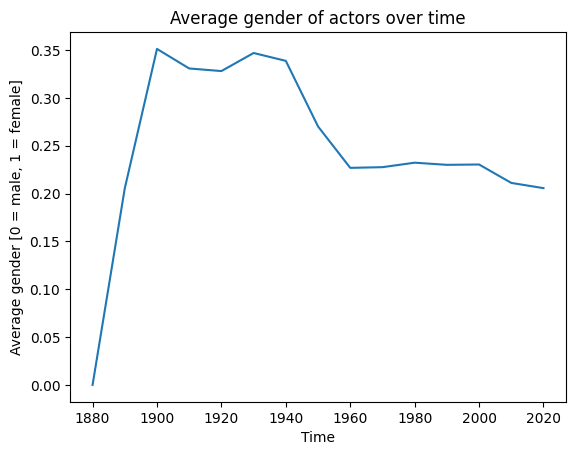

In [17]:
plt.plot(movie_actor_combi_per_decade["startDecade"], movie_actor_combi_per_decade["gender"])
plt.xlabel("Time")
plt.ylabel("Average gender [0 = male, 1 = female]")
plt.title("Average gender of actors over time")
plt.show()

In the first 20 years from 1880 and 1900, the amount of leading actress increased

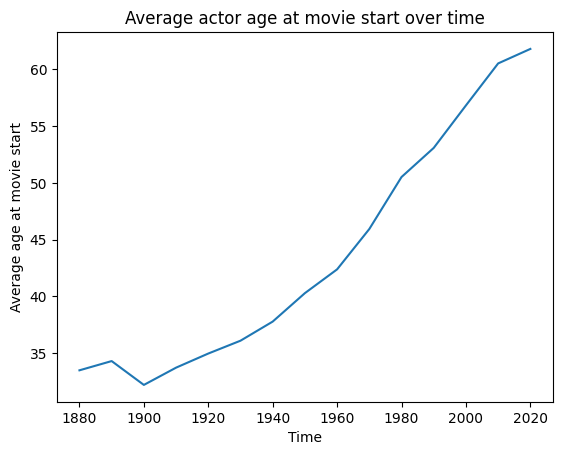

In [18]:
plt.plot(movie_actor_combi_per_decade["startDecade"], movie_actor_combi_per_decade["age_at_movie_start"])
plt.xlabel("Time")
plt.ylabel("Average age at movie start")
plt.title("Average actor age at movie start over time")
plt.show()

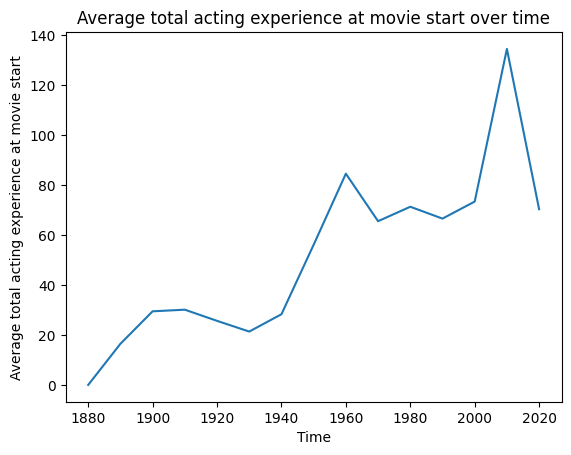

In [19]:
plt.plot(movie_actor_combi_per_decade["startDecade"], movie_actor_combi_per_decade["exp_so_far"])
plt.xlabel("Time")
plt.ylabel("Average total acting experience at movie start")
plt.title("Average total acting experience at movie start over time")
plt.show()

## Analysis of actor features over time (using ordering as weights)

In [20]:
def weighted_average(df, values, weights):
    return sum(df[weights] * df[values]) / df[weights].sum()

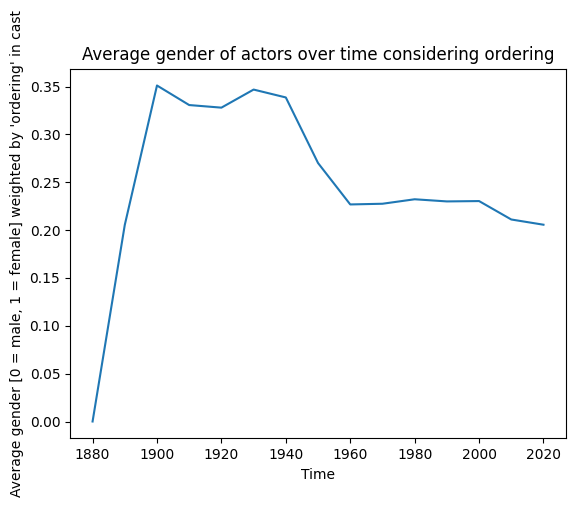

In [34]:
avg_gender_ordering_wght_per_decade = movie_actor_combi_per_decade.groupby("startDecade").apply(weighted_average, "gender", "ordering")
plt.plot(avg_gender_ordering_wght_per_decade.index, avg_gender_ordering_wght_per_decade.values)
plt.xlabel("Time")
plt.ylabel("Average gender [0 = male, 1 = female] weighted by 'ordering' in cast")
plt.title("Average gender of actors over time considering ordering")
plt.show()

In [ ]:
# TODO plot for every actorfeature over time with different lines for different used weights
# TODO reverse ordering so thaht ordering value of 1 is getting the highest points

## Analysis of successfull actor profiles over time (uses weights of movie success)